# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import json 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint
import requests
from scipy.stats import linregress
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
pp = pprint.PrettyPrinter(indent=4)
count = 0
city_data = []

for city in cities:
    count = count + 1 
    url = "https://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + weather_api_key                           
    response = requests.get(url)
    print ('Processing Record ' + str(count) + ' of Set 1 ' + city)
    if 'name' in response.json():
        name = response.json()['name']
    else: 
        print('City not found')
    
    try: 
        city_weather = requests.get(url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found...")
        pass

Processing Record 1 of Set 1 clyde river
Processing Record 2 of Set 1 katsuura
Processing Record 3 of Set 1 bethel
Processing Record 4 of Set 1 tuktoyaktuk
Processing Record 5 of Set 1 taolanaro
City not found
City not found...
Processing Record 6 of Set 1 ostersund
Processing Record 7 of Set 1 winneba
Processing Record 8 of Set 1 punta arenas
Processing Record 9 of Set 1 salalah
Processing Record 10 of Set 1 faanui
Processing Record 11 of Set 1 kargasok
Processing Record 12 of Set 1 ushuaia
Processing Record 13 of Set 1 vaini
Processing Record 14 of Set 1 barrow
Processing Record 15 of Set 1 bogorodskoye
Processing Record 16 of Set 1 atar
Processing Record 17 of Set 1 constitucion
Processing Record 18 of Set 1 aginskoye
Processing Record 19 of Set 1 bambous virieux
Processing Record 20 of Set 1 yellowknife
Processing Record 21 of Set 1 illoqqortoormiut
City not found
City not found...
Processing Record 22 of Set 1 albany
Processing Record 23 of Set 1 key west
Processing Record 24 of S

Processing Record 195 of Set 1 caravelas
Processing Record 196 of Set 1 longyearbyen
Processing Record 197 of Set 1 spearfish
Processing Record 198 of Set 1 lebu
Processing Record 199 of Set 1 gat
Processing Record 200 of Set 1 provideniya
Processing Record 201 of Set 1 azimur
City not found
City not found...
Processing Record 202 of Set 1 cabo san lucas
Processing Record 203 of Set 1 yuxia
Processing Record 204 of Set 1 cherskiy
Processing Record 205 of Set 1 kuche
City not found
City not found...
Processing Record 206 of Set 1 buraydah
Processing Record 207 of Set 1 codrington
Processing Record 208 of Set 1 edson
Processing Record 209 of Set 1 tiksi
Processing Record 210 of Set 1 birao
Processing Record 211 of Set 1 ojinaga
Processing Record 212 of Set 1 satitoa
City not found
City not found...
Processing Record 213 of Set 1 ornskoldsvik
Processing Record 214 of Set 1 aklavik
Processing Record 215 of Set 1 margate
Processing Record 216 of Set 1 padang
Processing Record 217 of Set 1 o

Processing Record 390 of Set 1 sao joao da barra
Processing Record 391 of Set 1 saldanha
Processing Record 392 of Set 1 denizli
Processing Record 393 of Set 1 kysyl-syr
Processing Record 394 of Set 1 sawtell
Processing Record 395 of Set 1 kamenka
Processing Record 396 of Set 1 mae hong son
Processing Record 397 of Set 1 sao gabriel
Processing Record 398 of Set 1 carutapera
Processing Record 399 of Set 1 vaitupu
City not found
City not found...
Processing Record 400 of Set 1 antalaha
Processing Record 401 of Set 1 florianopolis
City not found...
Processing Record 402 of Set 1 te anau
Processing Record 403 of Set 1 tawau
Processing Record 404 of Set 1 campechuela
Processing Record 405 of Set 1 paita
Processing Record 406 of Set 1 matagami
Processing Record 407 of Set 1 kavaratti
Processing Record 408 of Set 1 humberto de campos
Processing Record 409 of Set 1 marsabit
Processing Record 410 of Set 1 iqaluit
Processing Record 411 of Set 1 mergui
City not found
City not found...
Processing R

Processing Record 583 of Set 1 arkhara
Processing Record 584 of Set 1 rock falls
Processing Record 585 of Set 1 shimoda
Processing Record 586 of Set 1 la libertad
Processing Record 587 of Set 1 umzimvubu
City not found
City not found...
Processing Record 588 of Set 1 miraflores
Processing Record 589 of Set 1 anadyr
Processing Record 590 of Set 1 gamba
Processing Record 591 of Set 1 vao
Processing Record 592 of Set 1 guerrero negro
Processing Record 593 of Set 1 umm lajj
Processing Record 594 of Set 1 severnoye
Processing Record 595 of Set 1 fort nelson
Processing Record 596 of Set 1 mpongwe
Processing Record 597 of Set 1 gelibolu
Processing Record 598 of Set 1 okakarara
Processing Record 599 of Set 1 safaga
Processing Record 600 of Set 1 kudahuvadhoo
Processing Record 601 of Set 1 northam
Processing Record 602 of Set 1 surt
Processing Record 603 of Set 1 kenora
Processing Record 604 of Set 1 reconquista
Processing Record 605 of Set 1 verkhniy fiagdon
Processing Record 606 of Set 1 waga

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)
city_data_pd.to_csv("WeatherPy.csv",encoding="utf-8",index=False)

city_data_pd.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,clyde river,70.4692,-68.5914,269.15,86,90,4.12,CA,1620954833
1,katsuura,35.1333,140.3000,296.48,73,75,2.06,JP,1620954834
2,bethel,41.3712,-73.4140,285.93,50,1,2.06,US,1620954835
3,tuktoyaktuk,69.4541,-133.0374,268.15,80,75,7.72,CA,1620955051
4,ostersund,63.1792,14.6357,279.26,100,40,2.57,SE,1620955053


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

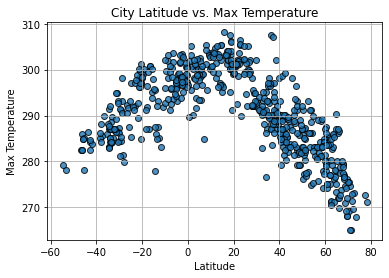

<Figure size 432x288 with 0 Axes>

In [40]:
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
# Saving graph
plt.savefig("Latitude vs Temperature")

## Latitude vs. Humidity Plot

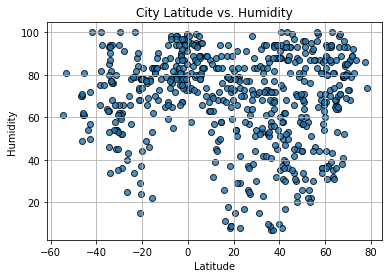

<Figure size 432x288 with 0 Axes>

In [41]:
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
# Saving graph
plt.savefig("Latitude vs Humidity")

## Latitude vs. Cloudiness Plot

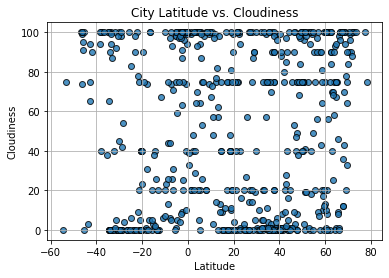

<Figure size 432x288 with 0 Axes>

In [42]:
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
# Saving graph
plt.savefig("Latitude vs Cloudiness")

## Latitude vs. Wind Speed Plot

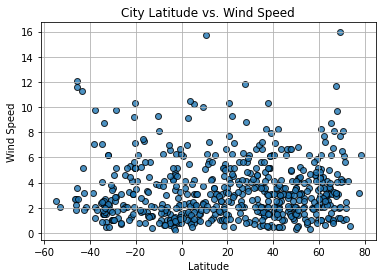

<Figure size 432x288 with 0 Axes>

In [43]:
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
# Saving graph
plt.savefig("Latitude vs Wind Speed")

## Linear Regression

In [49]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_data_pd.loc[pd.to_numeric(city_data_pd["Lat"]).astype(float) > 0, :]
southern_df = city_data_pd.loc[pd.to_numeric(city_data_pd["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

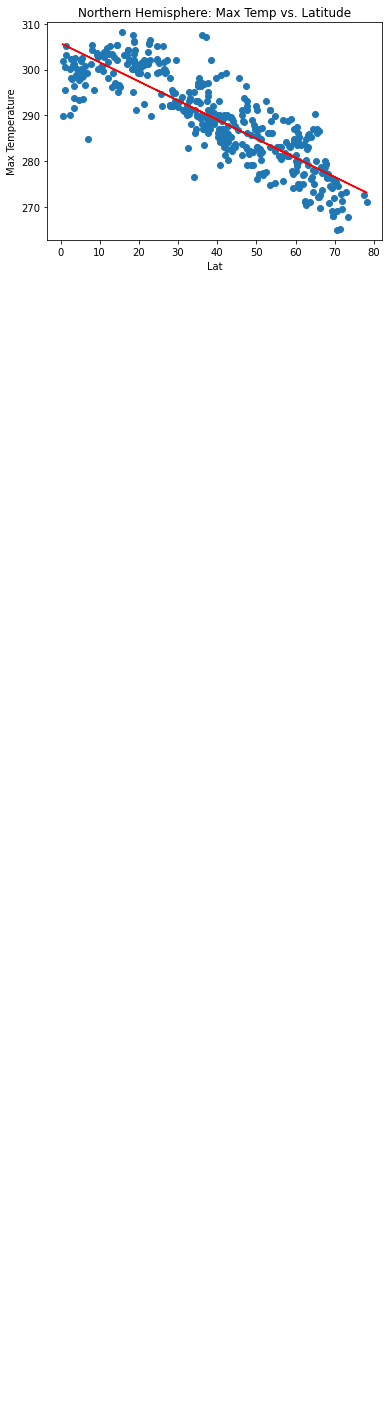

In [74]:
# Pulling values 
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression
regress_values = x_values * slope + intercept

# Plotting
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere: Max Temp vs. Latitude')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

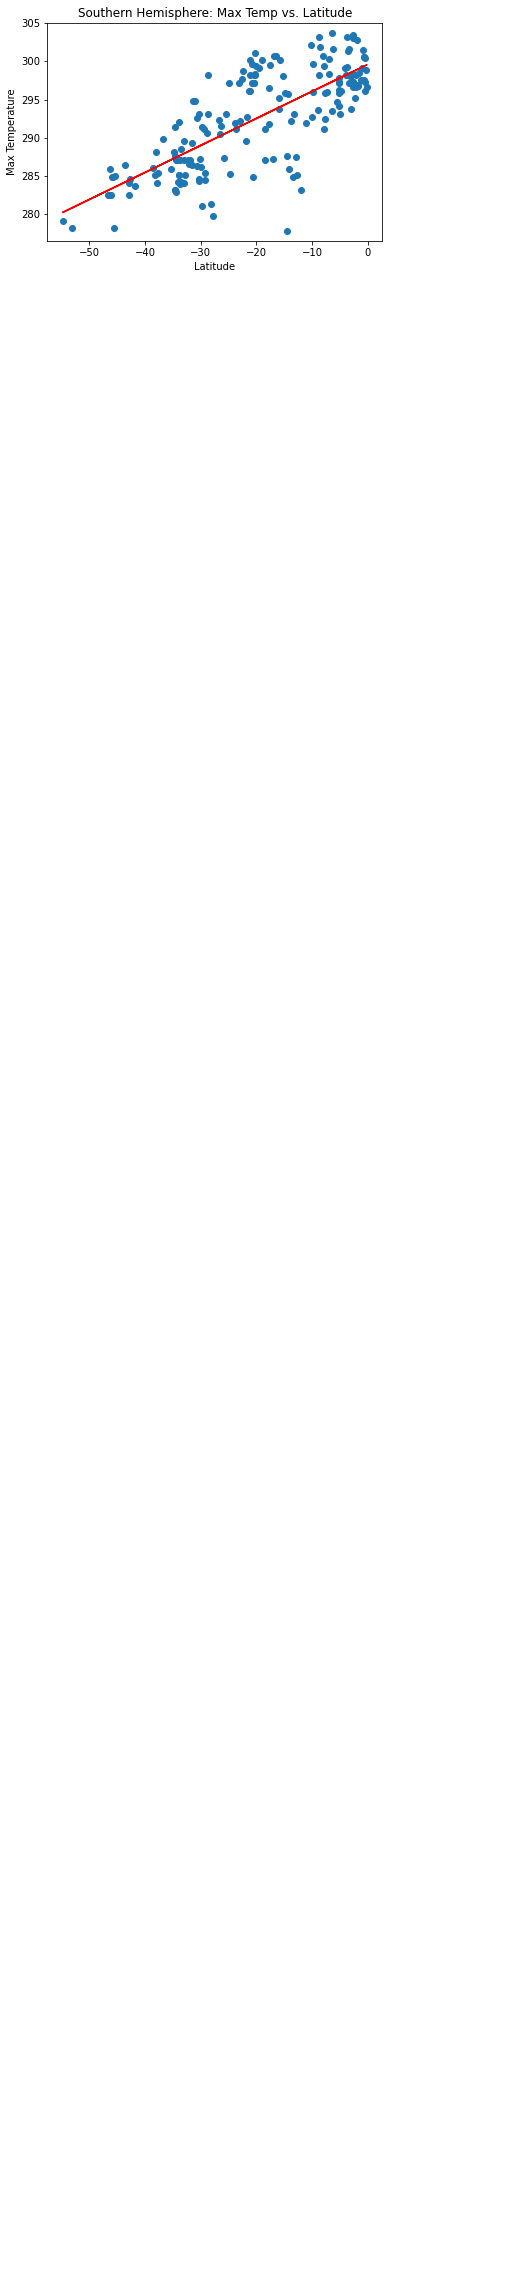

In [75]:
# Pulling values 
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression
regress_values = x_values * slope + intercept

# Plotting
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere: Max Temp vs. Latitude')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

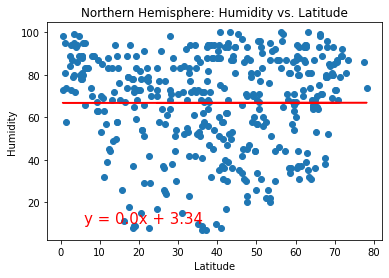

In [76]:
# Pulling values 
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression 
regress_values = x_values * slope + intercept

# Plotting
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Humidity vs. Latitude')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.43x + 81.73


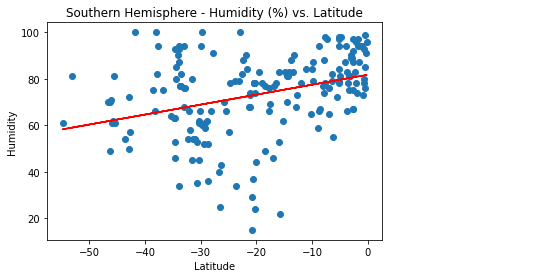

In [62]:
# Pulling values 
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression 
regress_values = x_values * slope + intercept

# Plotting
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere: Humidity vs. Latitude')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

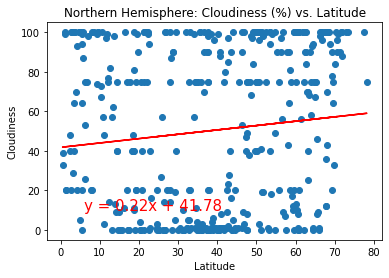

In [64]:
# Pulling values 
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values 
regress_values = x_values * slope + intercept

# Plotting 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

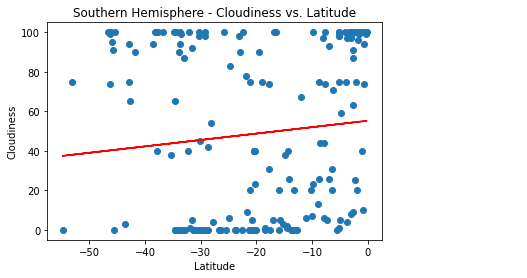

In [77]:
# Pulling values 
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression 
regress_values = x_values * slope + intercept

# Plotting 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

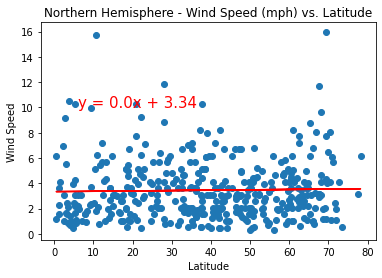

In [78]:
# Pulling values
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression 
regress_values = x_values * slope + intercept

# Plotting 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

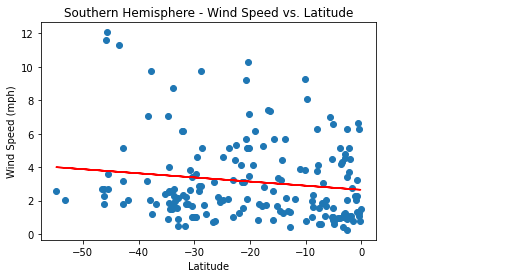

In [79]:
# Pulling values
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression 
regress_values = x_values * slope + intercept

# Plotting 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')

plt.show()